In [17]:
import pickle
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import scipy
plt.rcParams["figure.figsize"] = (11,7)

In [2]:
infile = open ("higgs_100000_pt_250_500.pkl", 'rb')
data_signal = pickle.load(infile)

signal = pd.DataFrame(data_signal)
signal.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [3]:
infile2 = open ("qcd_100000_pt_250_500.pkl", 'rb')
data_bg = pickle.load(infile2)

background = pd.DataFrame(data_bg)
background.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

### 1. Make a stacked histogram plot for the feature variable: mass

In [168]:
def plot_stack(key, units):
    plt.hist(signal[key], 500, weights = [.001]*len(signal), histtype = 'step', fill = False)
    plt.hist(background[key], 500, weights = [.2]*len(background), histtype = 'step', fill = False)
    plt.xlabel('Signal ' + key + ' (' + units + ')')
    plt.ylabel('Counts')
    plt.show()

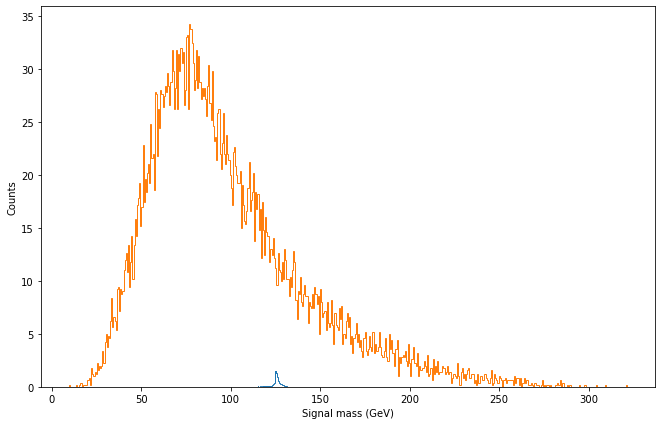

In [169]:
plot_stack('mass', 'GeV')

Make sure histogram is normalized:

#### Evaluate expected significance without any event selection. Use Poisson statistics for significance calculation. Compare the exact significance to the approximation $\frac{N_{Higgs}}{\sqrt(N_{QCD})} $. If they are equivalent, explain your findings.

From the classification of the low pt data, we have a poisson background with a mean of 20000 and an expected 100 Higgs events. We can calculate the significance of the background plus the amount of expected events. 

In [47]:
# Calculate significance
p = (1-scipy.stats.poisson.cdf(20100, 20000))
print('sigma significance of {0:1.2f}'.format(stats.norm.ppf(1-p)))

sigma significance of 0.71


In [ ]:
# Approximation 
print('{0:1.2f}'.format(100/np.sqrt(20000)))

!!!explain this,Why are they the same

### 2. Identify mass cuts to optimize the expected significance.
Try different mass cuts systematically

Evaluate expected significance for each set of mass cuts

Identify the set of mass cuts which give you the highest significance.

In [125]:
def slicer(lower, upper, key, signal, bkgd):
    bkgd_n = bkgd[key]
    signal_n = signal[key]
    bkgd_slice = bkgd_n[lower:upper:1]
    signal_slice = signal_n[lower:upper:1]
    
    bkgd_avg = 20000 * len(bkgd_slice)/len(bkgd_n)
    signal_avg = 100 * len(signal_slice)/len(signal_n)
    
    p = (1-scipy.stats.poisson.cdf(bkgd_avg + signal_avg, bkgd_avg))
    print('Significance of {0:1.3f} for a cut from {1:1.1f} to {2:1.1f}'.format(stats.norm.ppf(1-p),lower,upper))

    return(signal_slice, bkgd_slice)

In [126]:
signal_slice, bkgd_slice = slicer(0,3000, 'mass', signal, background)

Significance of 0.286 for a cut from 0.0 to 3000.0


### 3. Make two sets of stacked histogram plots for the rest of the features
Set A without any event selection

-Can you identify another feature as discriminative as mass? (i.e. equal or better significance after feature cut)

Set B with your optimal mass cuts

-Can you identify another feature to further improve your expected signifiance?

### 4. Optimize event selections using multiple features (if necessary)
Find a set of feature cuts which achieve high expected significance.

Compare significance (before/after event selection) derived in your pT samples to your lab partner. Describe your findings.